In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 

In [2]:
housingFile=pd.read_csv("housing.csv")

In [98]:
housingFile.head()
data2=housingFile[['housing_median_age','total_rooms','total_bedroom','population','households','median_income']]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


##### 1. Missing Value check

In [5]:
housingFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
housingFile.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [14]:
housingFile['total_rooms'].describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

In [18]:
range=housingFile['total_rooms'].max() - housingFile['total_rooms'].min()
print('range = '+ str(range))

range = 39318.0


In [22]:
print('median: ' + str(housingFile['total_rooms'].median()))

median: 2127.0


In [23]:
print('variance:' + str(housingFile['total_rooms'].std()**2))

variance:4759445.105938627


In [28]:
QuartileRanges=housingFile['total_rooms'].describe([0.12,.25,.50,.75])
print(QuartileRanges)

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
12%       1028.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64


Text(0.5, 1.0, 'House Value(Target Feature)')

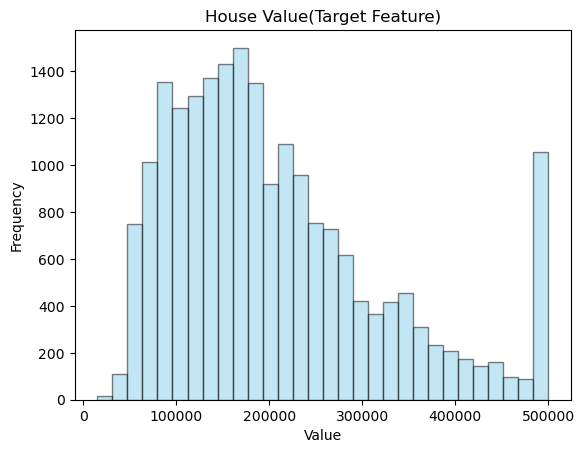

In [44]:
plt.hist(housingFile['median_house_value'],color='skyblue',bins=30,edgecolor='black',label='Meadian House Value',alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('House Value(Target Feature)')

Text(0.5, 1.0, 'House Value')

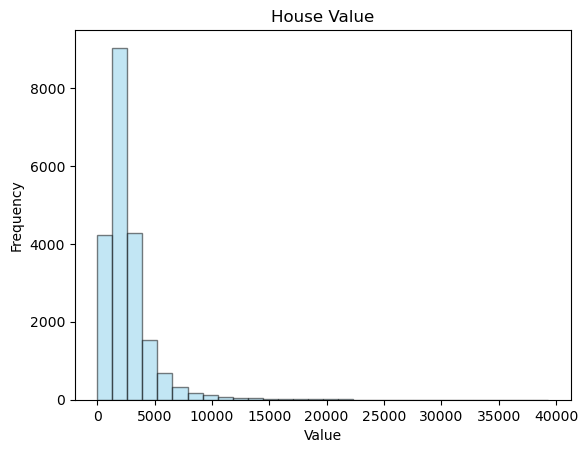

In [46]:
plt.hist(housingFile['total_rooms'],color='skyblue',bins=30,edgecolor='black',label='Meadian House Value',alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('House Value')

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


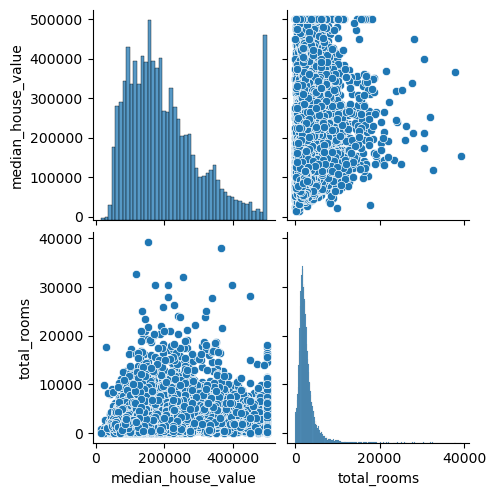

In [84]:
data=housingFile[['median_house_value','total_rooms']]
sns.pairplot(data)

#### Ans 5

<Axes: >

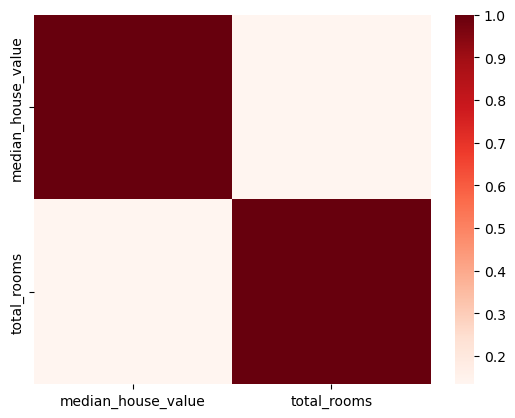

In [95]:
corr=data.corr()
corr
sns.heatmap(corr, cmap='Reds')

#### Ans 6

In [122]:
data2=housingFile[['housing_median_age','total_rooms','population','households','median_income','total_bedrooms','ocean_proximity']]

In [123]:
data2.head()

,housing_median_age,total_rooms,population,households,median_income,total_bedrooms,ocean_proximity
0,41.0,880.0,322.0,126.0,8.3252,129.0,2
1,21.0,7099.0,2401.0,1138.0,8.3014,1106.0,2
2,52.0,1467.0,496.0,177.0,7.2574,190.0,2
3,52.0,1274.0,558.0,219.0,5.6431,235.0,2
4,52.0,1627.0,565.0,259.0,3.8462,280.0,2


In [106]:
housingFile['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [118]:
housingFile['ocean_proximity']=housingFile['ocean_proximity'].replace(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],[2,2,1,2,3])

In [116]:
housingFile[['ocean_proximity','median_house_value']].groupby('ocean_proximity').mean()

,median_house_value
ocean_proximity,
<1H OCEAN,240084.285464
INLAND,124805.392001
ISLAND,380440.000000
NEAR BAY,259212.311790
NEAR OCEAN,249433.977427


In [120]:
housingFile.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2


In [124]:
scaler = StandardScaler() 
  
# transform data 
data2 = scaler.fit_transform(data2) 

In [126]:
data2

array([[ 0.98214266, -0.8048191 , -0.9744286 , ...,  2.34476576,
        -0.97032521,  0.68074681],
       [-0.60701891,  2.0458901 ,  0.86143887, ...,  2.33223796,
         1.34827594,  0.68074681],
       [ 1.85618152, -0.53574589, -0.82077735, ...,  1.7826994 ,
        -0.82556097,  0.68074681],
       ...,
       [-0.92485123, -0.17499526, -0.3695372 , ..., -1.14259331,
        -0.12547157, -1.46569592],
       [-0.84539315, -0.35559977, -0.60442933, ..., -1.05458292,
        -0.30583358, -1.46569592],
       [-1.00430931,  0.06840827, -0.03397701, ..., -0.78012947,
         0.18541559, -1.46569592]])